<a href="https://colab.research.google.com/github/ayyucedemirbas/dpt-dinov2/blob/main/dpt_dinov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.5 MB/s eta 0:00:00


In [2]:
import torch
import cv2
import numpy as np
from PIL import Image
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import supervision as sv

In [3]:
processor = AutoImageProcessor.from_pretrained("facebook/dpt-dinov2-small-kitti")
model = AutoModelForDepthEstimation.from_pretrained("facebook/dpt-dinov2-small-kitti")

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/442 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/149M [00:00<?, ?B/s]

In [4]:
image_path = "holiday.jpg"
image = Image.open(image_path)

In [5]:
inputs = processor(images=image, return_tensors="pt")

In [6]:
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

In [7]:
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
).squeeze()

In [8]:
depth_map = prediction.numpy()
depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min()) * 255.0
depth_map = depth_map.astype(np.uint8)

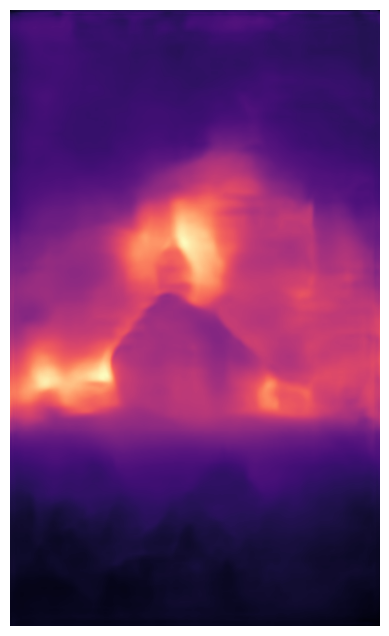

In [9]:
depth_colormap = cv2.applyColorMap(depth_map, cv2.COLORMAP_MAGMA)
sv.plot_image(image=depth_colormap, size=(8, 8))